Simulation of a Noddy history and visualisation of output
=============

This example shows how the module pynoddy.history can be used to compute the model, and how simple visualisations can be generated with pynoddy.output.

In [1]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [15]:
%matplotlib inline

In [22]:
# Basic settings
import sys, os
import subprocess

# Now import pynoddy
import pynoddy
reload(pynoddy)
import pynoddy.output
import pynoddy.history

# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')

Compute the model
------------------

The simplest way to perform the Noddy simulation through Python is simply to call the executable. One way that should be fairly platform independent is to use Python's own subprocess module:

In [10]:
# Change to sandbox directory to store results
os.chdir(os.path.join(repo_path, 'sandbox'))

# Path to exmaple directory in this repository
example_directory = os.path.join(repo_path,'examples')
# Compute noddy model for history file
history_file = 'simple_two_faults.his'
history = os.path.join(example_directory, history_file)
output_name = 'noddy_out'
# call Noddy

# NOTE: Make sure that the noddy executable is accessible in the system!!
print subprocess.Popen(['noddy.exe', history, output_name, 'BLOCK'], 
                       shell=False, stderr=subprocess.PIPE, 
                       stdout=subprocess.PIPE).stdout.read()
#

For convenience, the model computation is wrapped into a Python function in pynoddy:

In [11]:
pynoddy.compute_model(history, output_name)

''

Note: The Noddy call from Python is, to date, calling Noddy through the subprocess function. In a future implementation, this call could be substituted with a full wrapper for the C-functions written in Python. Therefore, using the member function compute_model is not only easier, but also the more "future-proof" way to compute the Noddy model.

Loading Noddy output files
--------------------------

Noddy simulations produce a variety of different output files, depending on the type of simulation. The basic output is the geological model. Additional output files can contain geophysical responses, etc.

Loading the output files is simplified with a class class container that reads all relevant information and provides simple methods for plotting, model analysis, and export. To load the output information into a Python object:


In [12]:
N1 = pynoddy.output.NoddyOutput(output_name)

The object contains the calculated geology blocks and some additional information on grid spacing, model extent, etc. For example:

In [13]:
print("The model has an extent of %.0f m in x-direction, with %d cells of width %.0f m" %
      (N1.extent_x, N1.nx, N1.delx))

The model has an extent of 12400 m in x-direction, with 124 cells of width 100 m


Plotting sections through the model
-----------------------------------

The NoddyOutput class has some basic methods for the visualisation of the generated models. To plot sections through the model:

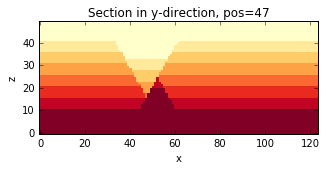

In [23]:
N1.plot_section('y', figsize = (5,3))

Export model to VTK
--------------------

A simple possibility to visualise the modeled results in 3-D is to export the model to a VTK file and then to visualise it with a VTK viewer, for example Paraview. To export the model, simply use:

In [21]:
N1.export_to_vtk()

The exported VTK file can be visualised in any VTK viewer, for example in the (free) viewer Paraview (www.paraview.org). An example visualisation of the model in 3-D is presented in the figure below.

![3-D Visualisation generated with Paraview (top layer transparent)](1-Simulation_files/3d_render_fault_model_2.png "3-D Visualisation generated with Paraview")